In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from IPython.display import display
from sklearn.metrics.pairwise import pairwise_distances


Data Pre-processing

In [ ]:
data = pd.read_csv('../Data/anomalies.csv')

data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')
data.fillna(method='ffill', inplace=True)

#data['acc_magnitude'] = np.sqrt(data['acc_x']**2 + data['acc_y']**2 + data['acc_z']**2)

#data['acc_z_smooth'] = data['acc_z'].rolling(window=10, center=True).mean()
# data['acc_magnitude_smooth'] = data['acc_magnitude'].rolling(window=10, center=True).mean()


# data['speed_diff'] = data['speed'].diff().fillna(0)


Feature Engineering

In [61]:

features = data[['acc_x', 'acc_y', 'acc_z', 'speed_diff', 'magnitude','road_type']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.fillna(features.mean()))


In [62]:
# wcss = []

# # Try different numbers of clusters, e.g., from 1 to 10
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_features)  # Use the scaled features from the previous steps
#     wcss.append(kmeans.inertia_)  # WCSS is stored in the 'inertia_' attribute

# # Plotting the Elbow Curve
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.title('Elbow Curve to Determine Optimal Number of Clusters')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.xticks(range(1, 11))
# plt.grid(True)
# plt.show()

Clustering using K-Means

In [63]:

kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 3 clusters (potholes, speed bumps, normal driving)
data['cluster'] = kmeans.fit_predict(scaled_features)

cluster_to_class = {
    0: 'probably pothole',
    1: 'probably speed bump',
}

data['class'] = data['cluster'].map(cluster_to_class)



Visualisation

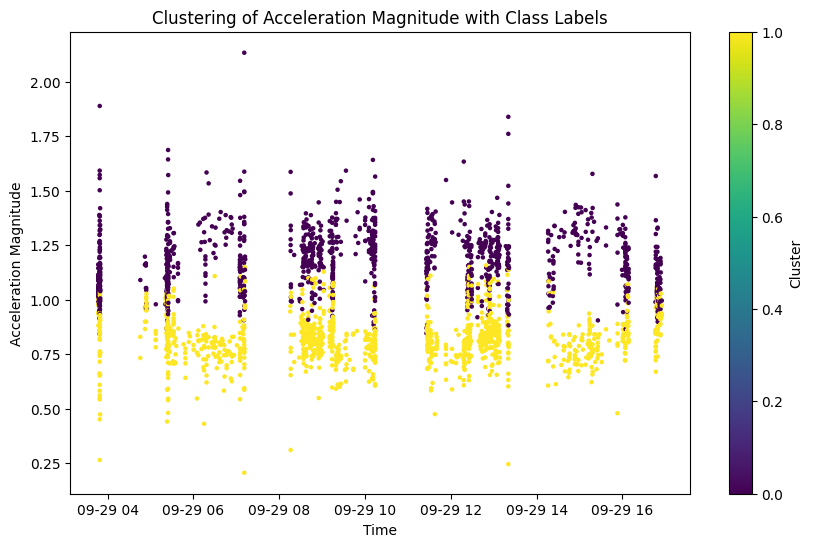


Sample of labeled data:



,time,latitude,longitude,acc_z,class
536,2022-09-29 06:13:40.040,42.738790,-2.917383,0.851,probably speed bump
944,2022-09-29 08:43:12.717,42.592560,-3.785823,0.794,probably speed bump
2036,2022-09-29 13:04:52.029,42.512844,-3.715839,1.170,probably pothole
1119,2022-09-29 09:01:36.016,42.721710,-4.045633,1.147,probably pothole
596,2022-09-29 06:36:04.693,42.615993,-3.195291,0.706,probably speed bump


In [64]:

plt.figure(figsize=(10, 6))
plt.scatter(data['time'], data['magnitude'], c=data['cluster'], cmap='viridis', s=5)
plt.title('Clustering of Acceleration Magnitude with Class Labels')
plt.xlabel('Time')
plt.ylabel('Acceleration Magnitude')
plt.colorbar(label='Cluster')
plt.show()

data.to_csv('labeled_accelerometer_data.csv', index=False)

print("\n\033[4mSample of labeled data:\033[0m\n")
display(data[['time', 'latitude', 'longitude', 'acc_z', 'class']].sample(n=5))


Evaluation

In [65]:
centroids = kmeans.cluster_centers_

distances = pairwise_distances(centroids)

print(f"\n\033[4mDistances between cluster centroids:\033[0m\n")
print(distances)

print(f"\n\033[4mClass distribution:\033[0m\n")
display(data['class'].value_counts().to_frame())



Distances between cluster centroids:

[[0.         2.76136708]
 [2.76136708 0.        ]]

Class distribution:



,count
class,
probably speed bump,1332
probably pothole,1293
